# BASICS OF PYTHON | SESSION 5

---
Hiren Mwanje Maddara | October 2024
---


Please follow the next steps over the next 3 hours in order to complete your exam successfully:


1. Download **Spotify Song Attributes** dataset from [HERE](https://www.kaggle.com/datasets/geomack/spotifyclassification).
2. Import dataset in **Google Colab**.
3. Overview dataset and define **one reasonable question**. An important point is to select a question that you will be able to implement statistical tests and plotting.
4. **Preprocess** the dataset to start your analysis.
5. Implement the **statistical models**.
6. **Plot** your results.
7. Set up your **GitHub** account. You can get help from this [LINK](https://docs.aws.amazon.com/codedeploy/latest/userguide/tutorials-github-create-github-account.html).
8. Upload your code and results in a **repository**.
9. Modify the repository title and description then **publish it**.
10. **Share your public repository** [HERE](https://docs.google.com/spreadsheets/d/1bveNOi9efLNgxqxh5uH5xhNG57bQ7DPCnG_sLAX4wmY/edit?usp=sharing).


# 1.&nbsp;Data Importing

In [14]:
# import libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


data = pd.read_csv(r"C:\Users\hiren\Desktop\spotify_song_attributes-data.csv")

# 2.&nbsp;Data Cleaning (overview)

In [15]:
print(data)

# shape
print("shape... \n")
data.shape

print("Shape of the DataFrame:", data.shape)
print("\nData Types:\n", data.dtypes)
print("\nFirst few rows:\n", data.head())
print("\nSummary Statistics:\n", data.describe())


      Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0              0       0.01020         0.833       204600   0.434   
1              1       0.19900         0.743       326933   0.359   
2              2       0.03440         0.838       185707   0.412   
3              3       0.60400         0.494       199413   0.338   
4              4       0.18000         0.678       392893   0.561   
...          ...           ...           ...          ...     ...   
2012        2012       0.00106         0.584       274404   0.932   
2013        2013       0.08770         0.894       182182   0.892   
2014        2014       0.00857         0.637       207200   0.935   
2015        2015       0.00164         0.557       185600   0.992   
2016        2016       0.00281         0.446       204520   0.915   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0             0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1            

# 3.&nbsp;Data Cleaning (interpretability)

In [16]:
# make working copy
df = data.copy()

# data types
print("\ndata types... \n")
print(df.dtypes)

# rename ambiguous cols
df = df.rename(columns={'Unnamed: 0': 'id'})

# change duration from ms to mins
df["duration_ms"] = df["duration_ms"].apply(lambda ms: round(ms / 1000 / 60, 3))

# rename durationms to durationmin
df = df.rename(columns={'duration_ms': 'duration_min'})

# # check null values
print("\nChecking null values... \n")
print(df.isnull().sum())

# # check for duplicates
print("\nChecking for duplicates... \n")
print(df.duplicated().sum())

# make sure titles are strings
df['song_title'] = df['song_title'].apply(lambda x: str(x))

# Convert 'mode', 'key' to categorical
df['mode'] = df['mode'].astype('category')
df['key'] = df['key'].astype('category')

print("\nWhole dataset... \n")
print(df)



data types... 

Unnamed: 0            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

Checking null values... 

id                  0
acousticness        0
danceability        0
duration_min        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

Checking for duplicates... 

0

Whole dataset... 

        id  acousticness  d

# 4.&nbsp;Data Cleaning (reduction)

In [17]:

# qn 1: Does acousticness influence danceability?
#  what's the relationship btn a song's acousticness and its danceability

# drop unimportant cols
df_acoustic = df.drop(columns=['id', "speechiness", "key", "time_signature"])


print(df_acoustic)

      acousticness  danceability  duration_min  energy  instrumentalness  \
0          0.01020         0.833         3.410   0.434          0.021900   
1          0.19900         0.743         5.449   0.359          0.006110   
2          0.03440         0.838         3.095   0.412          0.000234   
3          0.60400         0.494         3.324   0.338          0.510000   
4          0.18000         0.678         6.548   0.561          0.512000   
...            ...           ...           ...     ...               ...   
2012       0.00106         0.584         4.573   0.932          0.002690   
2013       0.08770         0.894         3.036   0.892          0.001670   
2014       0.00857         0.637         3.453   0.935          0.003990   
2015       0.00164         0.557         3.093   0.992          0.677000   
2016       0.00281         0.446         3.409   0.915          0.000039   

      liveness  loudness mode    tempo  valence  target  \
0       0.1650    -8.795    

In [18]:
# which factors are mostly associated with high valence and popularity?

# relevant cols
df_pop = df[['valence', 'target', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'tempo']]
print("\nReduced DataFrame shape:", df_pop.shape)




Reduced DataFrame shape: (2017, 8)


# 5.&nbsp;Data Cleaning (noisy data)

In [19]:
# remove outliers using z scores

# z - scores
# question 1 - df_acoustic
z_scores = stats.zscore(df_acoustic[['acousticness', 'danceability']])
abs_z_scores = abs(z_scores)

threshold = 3
df_acoustic = df_acoustic[(abs_z_scores < threshold).all(axis=1)]


# question 2 
# Calculate Q1 and Q3 for valence and target
Q1_valence = df_pop['valence'].quantile(0.25)
Q3_valence = df_pop['valence'].quantile(0.75)
IQR_valence = Q3_valence - Q1_valence

Q1_target = df_pop['target'].quantile(0.25)
Q3_target = df_pop['target'].quantile(0.75)
IQR_target = Q3_target - Q1_target

# Define lower and upper bounds for outliers
lower_bound_valence = Q1_valence - 1.5 * IQR_valence
upper_bound_valence = Q3_valence + 1.5 * IQR_valence

lower_bound_target = Q1_target - 1.5 * IQR_target
upper_bound_target = Q3_target + 1.5 * IQR_target

# Identify outliers
outliers_valence = (df_pop['valence'] < lower_bound_valence) | (df_pop['valence'] > upper_bound_valence)
outliers_target = (df_pop['target'] < lower_bound_target) | (df_pop['target'] > upper_bound_target)

# Combine outlier conditions
outliers = outliers_valence | outliers_target

# Filter out outliers from the DataFrame
df_pop = df_pop[~outliers]

print("\nCleaned DataFrame shape:", df_pop.shape)



Cleaned DataFrame shape: (2017, 8)


# 6.&nbsp;Data Cleaning (completeness)

In [20]:
# fill in null acoustic values if any with mean
df_acoustic['acousticness'] = df_acoustic['acousticness'].fillna(df['acousticness'].mean())

print(df_acoustic[['acousticness', 'danceability']].describe())

       acousticness  danceability
count   1991.000000   1991.000000
mean       0.178209      0.621499
std        0.246480      0.159056
min        0.000003      0.152000
25%        0.009265      0.519000
50%        0.060200      0.633000
75%        0.251000      0.739000
max        0.967000      0.984000


# 7.&nbsp;Data Exploring


In [21]:
# Correlation between acousticness and danceability
corr_matrix = df_acoustic[['acousticness', 'danceability']].corr()
print(corr_matrix)


corr_matrix_pop = df_pop.corr()
print("\nSecond question \nCorrelation matrix:\n", corr_matrix_pop)

              acousticness  danceability
acousticness      1.000000     -0.143837
danceability     -0.143837      1.000000

Second question 
Correlation matrix:
                    valence    target  acousticness  danceability    energy  \
valence           1.000000  0.107930     -0.152227      0.442061  0.278383   
target            0.107930  1.000000     -0.129627      0.176706  0.039688   
acousticness     -0.152227 -0.129627      1.000000     -0.179894 -0.646319   
danceability      0.442061  0.176706     -0.179894      1.000000  0.038557   
energy            0.278383  0.039688     -0.646319      0.038557  1.000000   
instrumentalness -0.194630  0.152594      0.144397     -0.130561 -0.122890   
loudness          0.204968 -0.072000     -0.562021      0.104362  0.762177   
tempo            -0.014965  0.034732     -0.127596     -0.143538  0.165721   

                  instrumentalness  loudness     tempo  
valence                  -0.194630  0.204968 -0.014965  
target               

# 8.&nbsp;Data Analysis

In [22]:
# hypothesis testing
# Pearson correlation test
corr, p_value = stats.pearsonr(df_acoustic['acousticness'], df_acoustic['danceability'])

print(f"Pearson Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")


# popularity
corr_pop, p_value_pop = stats.pearsonr(df_pop['valence'], df_pop['target'])
print(f"\nQn2: Song popularity \nPearson correlation between valence and target: {corr_pop}, p-value: {p_value_pop}")

Pearson Correlation Coefficient: -0.14383654801871606
P-value: 1.1363578471349446e-10

Qn2: Song popularity 
Pearson correlation between valence and target: 0.10792964561000809, p-value: 1.1832402416563467e-06


# 9.&nbsp;Data Visualization

The relationship btn a song's acousticness and its danceability


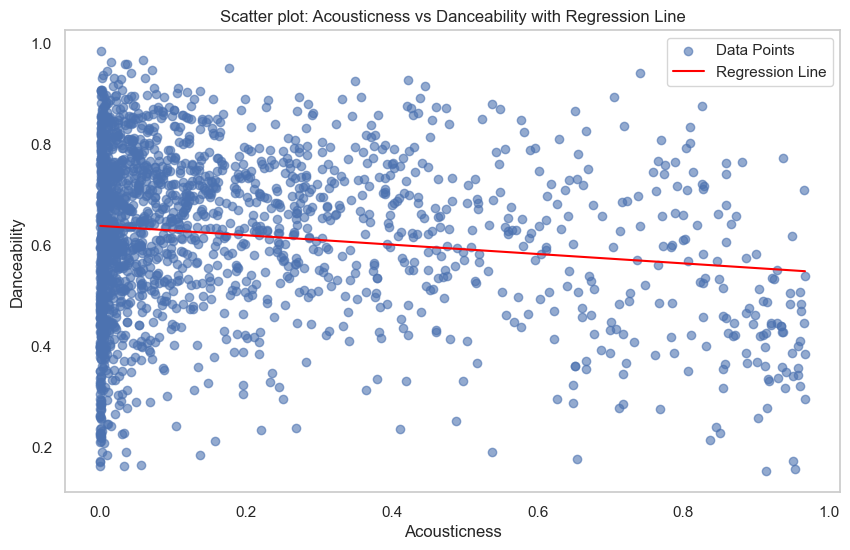

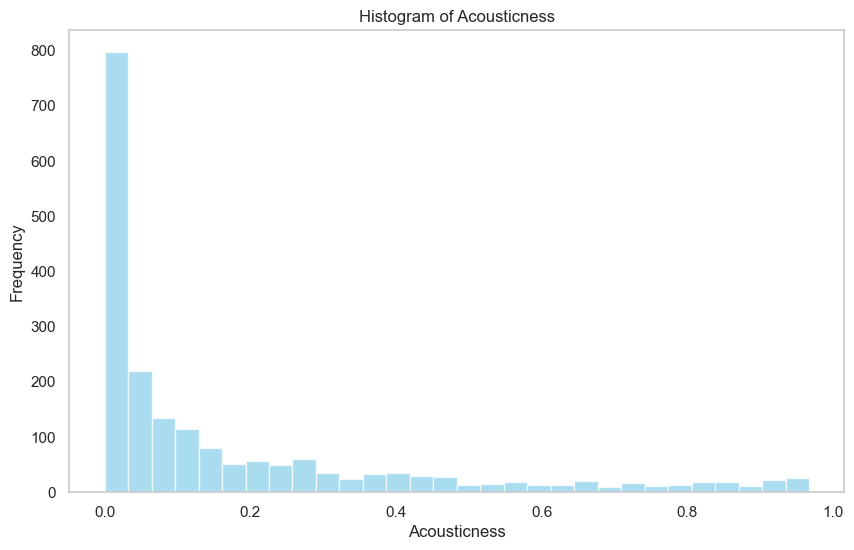

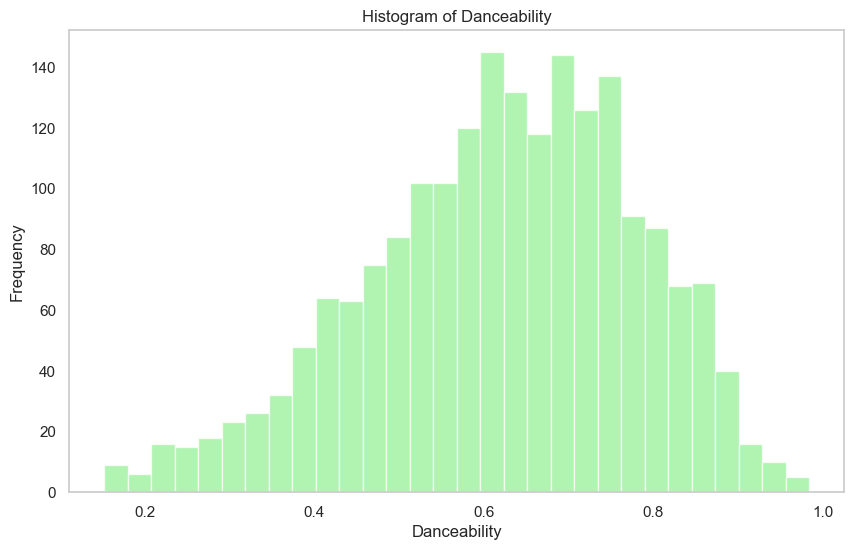


Which attributes are most associated with song valence and popularity?


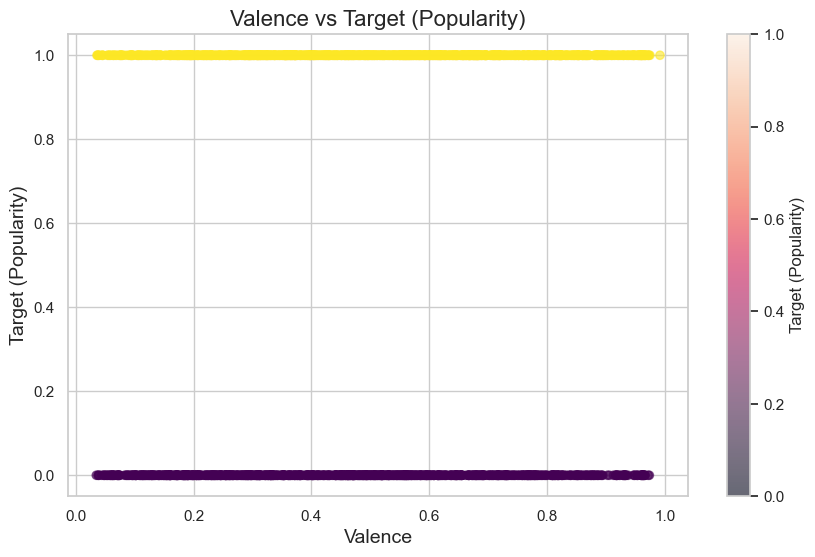

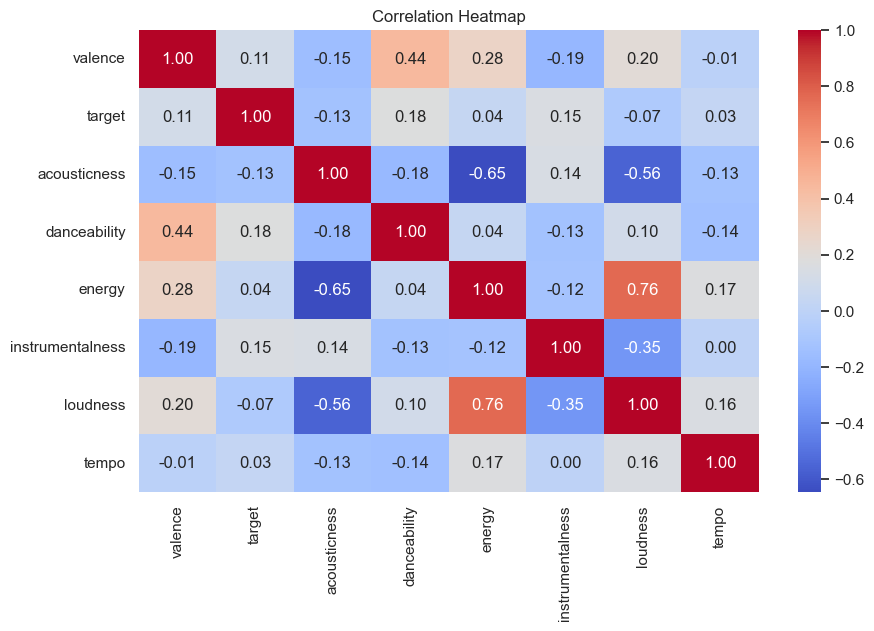

In [23]:
# Scatter plot to visualize the relationship between acousticness and danceability

# Fit a linear regression line
slope, intercept = np.polyfit(df_acoustic['acousticness'], df_acoustic['danceability'], 1)

# Create the regression line
x_values = np.linspace(df_acoustic['acousticness'].min(), df_acoustic['acousticness'].max(), 100)
y_values = slope * x_values + intercept

print("The relationship btn a song's acousticness and its danceability")

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df_acoustic['acousticness'], df_acoustic['danceability'], alpha=0.6, label='Data Points')
plt.plot(x_values, y_values, color='red', label='Regression Line')
plt.title('Scatter plot: Acousticness vs Danceability with Regression Line')
plt.xlabel('Acousticness')
plt.ylabel('Danceability')
plt.legend()
plt.grid()
plt.show()



# Histogram for Acousticness
plt.figure(figsize=(10, 6))
plt.hist(df_acoustic['acousticness'], bins=30, color='skyblue', alpha=0.7)
plt.title('Histogram of Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Frequency')
plt.grid()
plt.show()


# Histogram for Danceability
plt.figure(figsize=(10, 6))
plt.hist(df_acoustic['danceability'], bins=30, color='lightgreen', alpha=0.7)
plt.title('Histogram of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.grid()
plt.show()


# question 2
print("\nWhich attributes are most associated with song valence and popularity?")

import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")


# Create a scatter plot of valence vs target with color mapping
plt.figure(figsize=(10, 6))

# Normalize the target values for color mapping
norm = plt.Normalize(df_pop['target'].min(), df_pop['target'].max())
colors = plt.cm.viridis(norm(df_pop['target']))  # You can choose other colormaps like 'plasma', 'coolwarm', etc.

# Scatter plot
scatter = plt.scatter(df_pop['valence'], df_pop['target'], c=colors, alpha=0.6)
plt.title('Valence vs Target (Popularity)', fontsize=16)
plt.xlabel('Valence', fontsize=14)
plt.ylabel('Target (Popularity)', fontsize=14)
plt.colorbar(scatter, label='Target (Popularity)')  # Add color bar
plt.grid(True)
plt.show()


# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_pop, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



# 10.&nbsp;Data Exporting

In [24]:
# export in google collab
df_acoustic.to_csv('analysed_spotify_song_attributes_acoustic-danceability.csv', index=False)

df_pop.to_csv('analysed_spotify_song_attributes_popularity-valence.csv', index=False)